In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
from google.colab import files
uploaded=files.upload()
print(uploaded)


Saving Titanic-Dataset.csv to Titanic-Dataset.csv
{'Titanic-Dataset.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bo

In [7]:
data=pd.read_csv("/content/Titanic-Dataset.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
data.shape

(891, 12)

In [11]:
data.dtypes


,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [12]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [34]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [35]:
#Age and embarked columns have null values or blank
data['Age'].fillna(data['Age'].mean(),inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0],inplace=True)

<ipython-input-35-09f52931c985>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].mean(),inplace=True)
<ipython-input-35-09f52931c985>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [36]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [38]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


<Axes: xlabel='Survived', ylabel='count'>

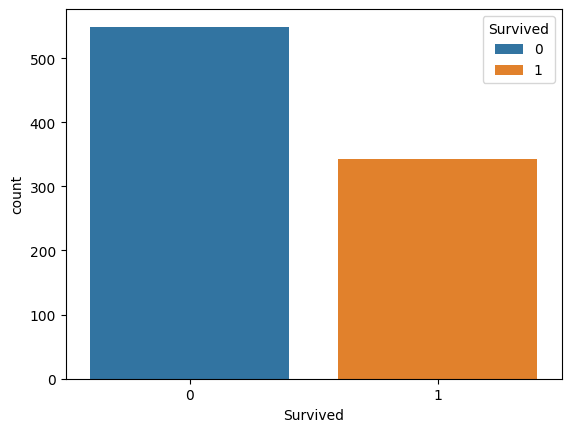

In [40]:
sns.countplot(x='Survived',data=data,hue='Survived')

<Axes: xlabel='Sex', ylabel='count'>

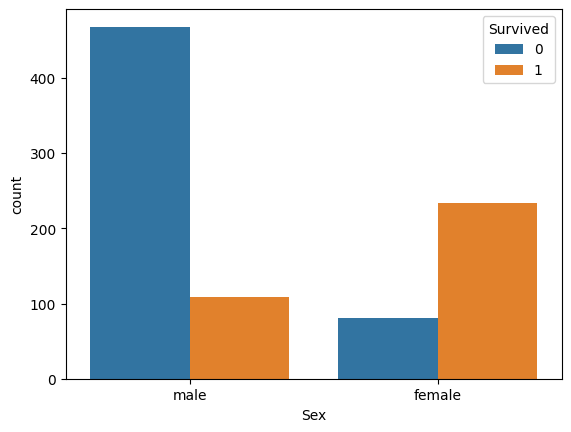

In [41]:
sns.countplot(x='Sex',data=data,hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

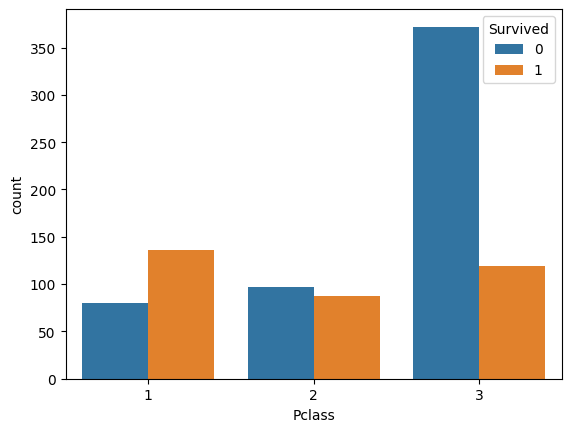

In [42]:
sns.countplot(x='Pclass',data=data,hue='Survived')

In [43]:
data['Embarked'].value_counts()

,count
Embarked,
S,646
C,168
Q,77


In [44]:
data['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [46]:
#converting categorical values
data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [49]:
#removing non esstinals columns
x=data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
y=data['Survived']

In [50]:
print(x)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [51]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [65]:
#model training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [66]:
print(x.shape,x_train.shape,x_test.shape)

(891, 7) (712, 7) (179, 7)


In [67]:
print(y.shape,y_train.shape,y_test.shape)

(891,) (712,) (179,)


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [69]:
x_pred=model.predict(x_train)
print(x_pred)

[1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1
 1 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 0 

In [70]:
train_data_accuracy=accuracy_score(y_train,x_pred)
print("Accuracy_score:",train_data_accuracy)

Accuracy_score: 0.8033707865168539


In [71]:
x_test_pred=model.predict(x_test)
print(x_test_pred)

[0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [72]:
test_data_accuracy=accuracy_score(y_test,x_test_pred)
print("Accuracy_score:",test_data_accuracy)

Accuracy_score: 0.8044692737430168
